In [1]:
%pip install patchify
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os 
import shutil 
import random

import cv2
import rasterio
from rasterio.plot import show

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
font = {'family' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

from patchify import patchify  #  cropp de imagenes
from patchify import unpatchify
import splitfolders #  splitting imagenes a validacion y train

In [3]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show


# Análisis exploratorio y visualización

In [5]:
image_names = os.listdir('images')
mask_names = os.listdir('masks')

In [6]:
print(f"Number of images: {len(image_names)}")
print(f"Number of masks: {len(mask_names)}")

Number of images: 7
Number of masks: 1


In [7]:
name = image_names[0]
src = rasterio.open('images'+'/'+name)

print('File name: ' + src.name)
print(f'Number of channels: {src.count}')
print(f'Size: {src.width}x{src.height}')
print(f'Bounds: {src.bounds}')

src.close()

File name: images/wales_cut4.tif
Number of channels: 13
Size: 353x797
Bounds: BoundingBox(left=399780.0, bottom=5852220.0, right=420960.0, top=5900040.0)


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

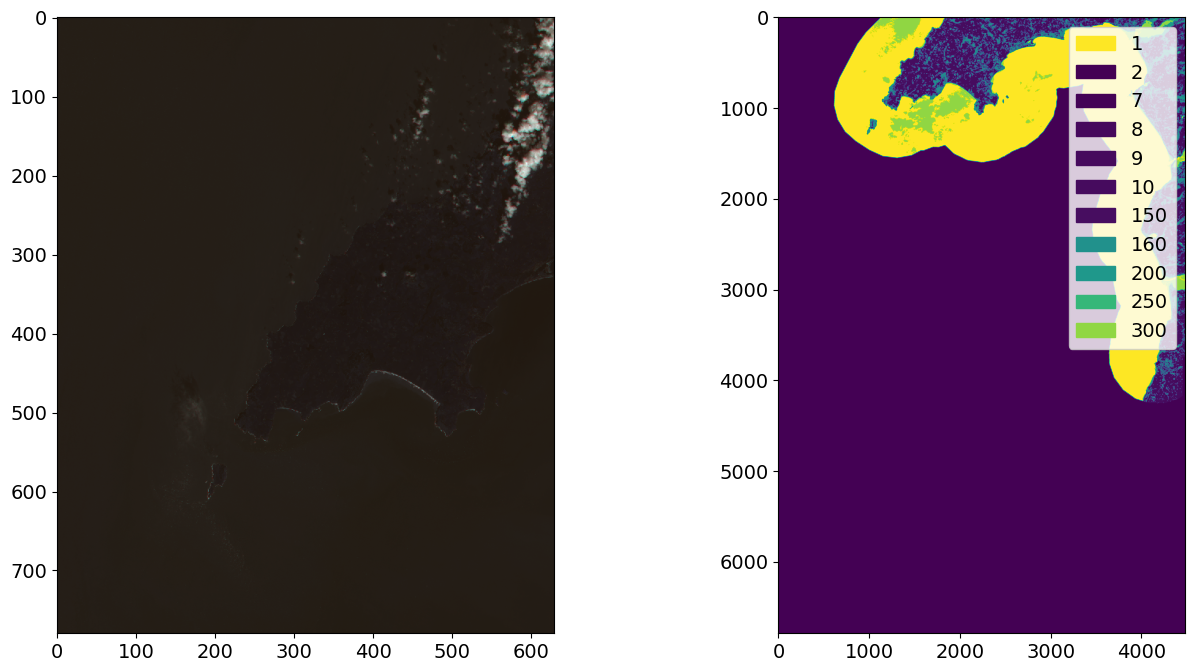

In [10]:
labels = {
    'Urban': 1,
    'Indus': 2,
    'Forest': 7,
    'Natural': 8,
    'BareSoil': 9,
    'Crops': 10,
    'Cliff': 150,
    'Mudflat': 160,
    'SandyBeach': 200,
    'Tidal': 250,
    'Sea': 300
}


index = random.randint(0,len(image_names)-1) # choose random image name
name = 'wales_cut_multiband.tif'

fig, axs = plt.subplots(1, 2, figsize=(16,8))

with rasterio.open('images'+'/'+name) as src:
    image = src.read()[:2+1].transpose(1,2,0) 
    image = rasterio.plot.adjust_band(image, [1, 2, 3]) # normalize image
    axs[0].imshow(image) # show image
    
with rasterio.open('masks'+'/'+'mask_wales.tif') as src:
    mask = src.read()[:2+1].transpose(1,2,0)
    im = axs[1].imshow(mask)  # show mask
    
    norm = plt.Normalize(vmin=0, vmax=max(labels.values()))
    colors = [im.cmap(norm(value)) for value in labels.values()]

    
    patches = [mpatches.Patch(color=colors[i-1], label=labels[name]) for i, name in enumerate(labels.keys())]

    plt.legend(handles=patches) # add legend with labels

plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

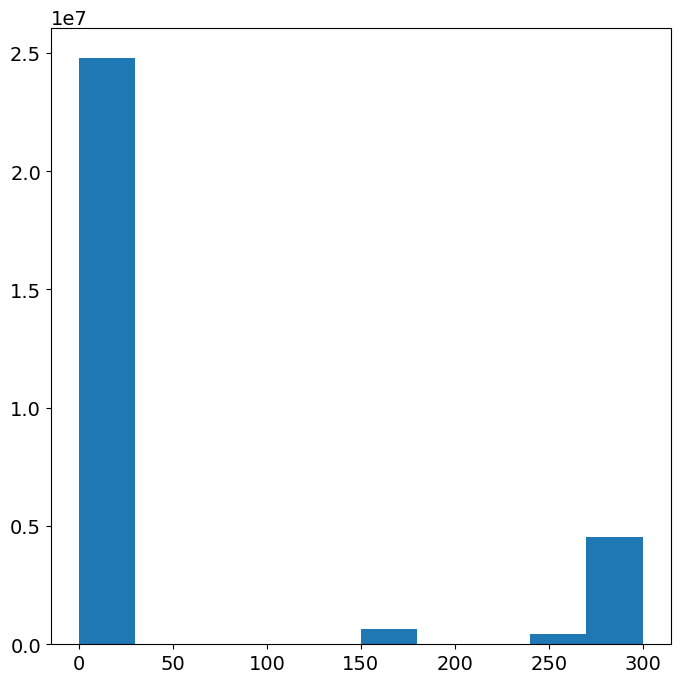

In [11]:
plt.figure(figsize=(8,8))
plt.hist(mask.flatten())
plt.show()

In [4]:
from osgeo import gdal

import numpy as np
import matplotlib.pyplot as plt

import glob


In [5]:
def visualise_multispectral(img, clip=[0.3]*13, display=True):
    """Visualise multispectral image with given clip values and return image"""

    # Scale image
    img = np.clip(img/10000, 0, 1)

    # Get multispectral channels
    multispectral = img[:13]

    # Clip multispectral values
    for i in range(13):
        multispectral[i] = np.clip(multispectral[i], 0, clip[i])/clip[i]

    multispectral = multispectral.transpose(1, 2, 0)

    if display:
        # Display histograms of pixel intensity with given clip values
        fig, axs = plt.subplots(4, 4, figsize=(22, 22))
        fig.patch.set_facecolor('xkcd:white')

        labels = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12']
        for i, ax in enumerate(axs.flatten()[:13]):
            ax.hist(img[i].flatten(), bins=100)
            ax.set_title(labels[i], size=20, fontweight="bold")
            ax.axvline(clip[i], color="red", linestyle="--")
            ax.set_yticks([])

        # Display multispectral image
        axs[-1, -1].imshow(multispectral)
        axs[-1, -1].set_title("Multispectral", size=20, fontweight="bold")
        axs[-1, -1].set_xticks([])
        axs[-1, -1].set_yticks([])

        for i in range(13, 16):
            axs[-1, i-13].axis('off')
        for i in range(13, 16):
            axs[i-13, -1].axis('off')

    return multispectral


In [6]:
import rasterio
import numpy as np

# Abrir la imagen dada la ruta
with rasterio.open("images/wales_cut4.tif") as src:
    # Leer todos los canales de la imagen como una matriz NumPy
    matriz = src.read()

# La forma de la matriz es (canales, alto, ancho)
print(matriz.shape)

# Imprimir la matriz resultante
print(matriz)


(13, 797, 353)
[[[   0.    0.    0. ... 1227. 1169. 1171.]
  [   0.    0.    0. ... 1121. 1113. 1118.]
  [   0.    0.    0. ... 1131. 1122. 1136.]
  ...
  [   0.    0.    0. ... 1292. 1291. 1290.]
  [   0.    0.    0. ... 1294. 1289. 1291.]
  [   0.    0.    0. ... 1300. 1300. 1296.]]

 [[   0.    0.    0. ... 1232.  983.  863.]
  [   0.    0.    0. ...  787.  778.  752.]
  [   0.    0.    0. ...  824.  815.  860.]
  ...
  [   0.    0.    0. ... 1089. 1069. 1078.]
  [   0.    0.    0. ... 1090. 1082. 1071.]
  [   0.    0.    0. ... 1086. 1086. 1088.]]

 [[   0.    0.    0. ... 1111. 1142.  927.]
  [   0.    0.    0. ...  608.  605.  566.]
  [   0.    0.    0. ...  655.  650.  727.]
  ...
  [   0.    0.    0. ...  836.  826.  829.]
  [   0.    0.    0. ...  834.  830.  829.]
  [   0.    0.    0. ...  833.  841.  836.]]

 ...

 [[   0.    0.    0. ... 2428. 2445. 1854.]
  [   0.    0.    0. ...  654.  653.  650.]
  [   0.    0.    0. ...  724.  686.  990.]
  ...
  [   0.    0.    0. ... 

 ## Patchify

In [ ]:
def create_patches(input_folder, output_folder, patch_size=256, datatype='image'):
    '''
    Crop de imágenes o máscaras dando una carpeta como input. Guarda los patches de tamaño patch_size * patch_size en una carpeta.

    input_folder --> path relativo a la carpeta con imágenes/máscaras a patchear
    output_folder --> path relativo a la carpeta destino donde se guardarán los patches
    patch_sizew --> tamaño de los patches (por defecto 256*256)
    datatype --> "image" o "mask". Por defecto "image". Afecta en el modo de lectura de cv2.


    '''
    
    if datatype == 'image':
        cv2_readmode = 1  # BGR readmode
        channels = 3
    elif datatype == 'mask':
        cv2_readmode = 0  # Gray readmode
        channels = 1
    else:
        print("Please, specify correct datatype: image or mask")
        print("Patches haven't been created.")
        return 0
    
    # Recorre todos los subdirectorios y para cada uno elige y lee cada imagen/máscara
    for path, subdirs, files in os.walk(input_folder):
        names = os.listdir(path)
        for k, name in enumerate(names):
            if name.endswith(".tif"):
                # lee la imagen/mascara
                image = cv2.imread(path + "/" + name, cv2_readmode)
                print(f"Processing {k}nd {datatype} {name} with shape: {image.shape}.")
                
                # Crop 
                SIZE_X = (image.shape[1] // patch_size) * patch_size
                SIZE_Y = (image.shape[0] // patch_size) * patch_size 
                image = image[:SIZE_Y, :SIZE_X] 
                
                # Crea y guarda parches para imagen/máscara (mismo algoritmo pero formas diferentes)
                patches = patchify(image, (patch_size, patch_size, channels), step=patch_size)
                for i in range(patches.shape[0]): 
                    for j in range(patches.shape[1]):
                        single_patch = patches[i, j]
                        if channels == 1:
                            cv2.imwrite(output_folder + name.split('.', 1)[0] + "_patch_" + str(i) + str(j) + ".tif",
                                        single_patch)
                        else:
                            cv2.imwrite(output_folder + name.split('.', 1)[0] + "_patch_" + str(i) + str(j) + ".tif",
                                        cv2.cvtColor(single_patch, cv2.COLOR_RGB2BGR))
                
                print(f"{k}nd {datatype} {name} is patched.")


In [ ]:
#looking at the data for first time..
file_loc =  os.getcwd() + "\XYZ.tif"
geo_img = rs.open(file_loc)
show(img)
print("Count: ",geo_img.count)
print("Height and widht: ", geo_img.height ,geo_img.width)
print("CRS", geo_img.crs)
print("bounds: ",geo_img.bounds)


In [ ]:
#visualizing all the spectral bands individually
display_name = ["Blue", "green", "red", "red edge", "near infrared"]
fig = plt.figure()
# to change size of subplot's
fig.set_figheight(20)
fig.set_figwidth(20)
spec = gridspec.GridSpec(ncols=5, nrows=1,wspace=0.5,
                         hspace=0.5)
n_cols = 5
for index in range(n_cols):
    ax = fig.add_subplot(spec[index])
    ax.title.set_text(display_name[index])
    ax.imshow(geo_img.read(index+1))
plt.show()

In [ ]:
#visualizing the distribution of bands in image
plt.figure(figsize=(10,10))
rs.plot.show_hist(geo_img)
plt.show()

In [ ]:
### Features for the data
with rs.open(file_loc, 'r') as file:
    arr_st = file.read()
# Data
# arr_st = np.stack(features)
features = np.moveaxis(arr_st, 0, -1)
print(features.shape) #(11652, 9210, 5)

In [ ]:
# making an empty list
image_dataset = []
#I am going to divide my image into 256*256
#make sure your image shape is divisible by the patch size or reshape your image accordingly
patch_size = 256
patches_img = patchify(features, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        single_patch_img = patches_img[i,j,:,:]
#Use minmaxscaler instead of just dividing by 255. 
        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
#single_patch_img = (single_patch_img.astype('float32')) / 255. 
        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
        image_dataset.append(single_patch_img)

In [ ]:
#visualizing the image to see if they are patch with correct label (no neccessary but to be sure)
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

In [ ]:
#hexa -> decimal
rice = '#ffd300'.lstrip('#')
rice= np.array(tuple(int(rice[i:i+2], 16) for i in (0, 2, 4)))
Wheat = '#267000'.lstrip('#')
wheat = np.array(tuple(int(wheat[i:i+2], 16) for i in (0, 2, 4)))

In [ ]:
#use this function to all mask_dataset values 
def rgb_to_2D_label(label):
label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == wheat,axis=-1)] = 1
    label_seg [np.all(label==rice,axis=-1)] = 2
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

In [ ]:
n_classes = len(np.unique(labels))
print(n_classes)
labels_cat = to_categorical(labels, num_classes=n_classes)
#spliting training test using sklearn library
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
sm.set_framework('tf.keras')
sm.framework()
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)
# preprocess input
X_train_prepr = preprocess_input(X_train)
X_test_prepr = preprocess_input(X_test)
# define model
model_resnet_backbone = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')
from keras import backend as K
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)
metrics=['accuracy', jacard_coef]
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
model_resnet_backbone.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= metrics)
#print(model_resnet_backbone.summary())

In [ ]:
history =model_resnet_backbone.fit(X_train_prepr, 
          y_train,
          batch_size=4, 
          epochs=10,
          verbose=1,
          validation_data=(X_test_prepr, y_test))

## Limpieza Crops

In [ ]:
useless=0  # useless image counter

for index in range(len(img_list)):
    img_name = img_list[index]
    mask_name = msk_list[index]
    
    temp_image=cv2.imread(train_img_dir+img_list[index], 1)
    temp_mask=cv2.imread(train_mask_dir+msk_list[index], 0)
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (counts[0]/counts.sum()) > 0.95 and val[0] == 0: # if mask has less than 5% of usefull info we ignore it
        useless +=1
    else:
        cv2.imwrite('256_patches/images_with_useful_info/images/'+img_name, temp_image)
        cv2.imwrite('256_patches/images_with_useful_info/masks/'+mask_name, temp_mask)
  
    if index%1000 == 0:
        print(f'Current index {index}')

print("Total useful images are: ", len(img_list)-useless)
print("Total useless images are: ", useless)

# Pruebas mergeo

In [ ]:

# Ruta a las bandas
band_paths = ['LC08_L1TP_018030_20210626_20210703_02_T1_B{}.TIF'.format(band) for band in range(2, 9)]

# Abrir las bandas y obtener sus metadatos
src_files_to_mosaic = [rasterio.open(band_path) for band_path in band_paths]
src_files_meta = src_files_to_mosaic[0].meta

# Unir las bandas
mosaic, out_trans = merge(src_files_to_mosaic)

# Actualizar los metadatos
src_files_meta.update({"driver": "GTiff",
                       "height": mosaic.shape[1],
                       "width": mosaic.shape[2],
                       "transform": out_trans})

# Guardar la imagen unida
with rasterio.open("LC08_L1TP_018030_20210626_20210703_02_T1_merged.tif", "w", **src_files_meta) as dest:
    dest.write(mosaic)

In [ ]:
import os
import rasterio
from rasterio.merge import merge
from rasterio.enums import Resampling

def merge_bands_2_5(input_folder, output_file):
    # Buscamos los archivos de las bandas 2, 3, 4 y 5
    bands = ['B02', 'B03', 'B04', 'B05']
    files = []
    for file in os.listdir(input_folder):
        for band in bands:
            if band in file:
                files.append(os.path.join(input_folder, file))
                break
                
    # Leemos las bandas y hacemos resampling de las de 20m a 10m
    data = []
    for file in files:
        with rasterio.open(file) as src:
            if src.res[0] == 20.0:
                data.append(src.read(1, out_shape=(src.count, int(src.height * 2), int(src.width * 2)), resampling=Resampling.bilinear))
            else:
                data.append(src.read(1))
    
    # Combinamos las bandas en una única imagen
    merged, _ = merge(data)
    
    # Guardamos la imagen resultante
    profile = src.profile
    profile.update(count=len(bands), dtype=merged.dtype)
    with rasterio.open(output_file, 'w', **profile) as dst:
        dst.write(merged)


Explicación del código:

La función merge_bands_2_5 recibe dos parámetros: input_folder es la carpeta donde se encuentran los archivos de las bandas y output_file es la ruta del archivo de salida.
Primero, se buscan los archivos correspondientes a las bandas 2, 3, 4 y 5 en la carpeta de entrada.
Luego, se leen las bandas y se hace resampling de las bandas de 20m a 10m, utilizando el método read de rasterio con el parámetro out_shape y resampling.
Se combinan las bandas utilizando la función merge de rasterio.
Finalmente, se guarda la imagen resultante en el archivo de salida utilizando el perfil de una de las bandas de entrada.